# 7.3 Other Useful Tests of Significance

Beyond comparing population means, we often need to test hypotheses about variances or about how well a model fits data. This section introduces F-tests for comparing variances and χ² (chi-square) tests for assessing model fit.

## 7.3.1 F-Tests and Standard Deviations

### Motivation

Before using a pooled t-test (Section 7.2.2), we assumed the two populations have equal variances. But is this assumption reasonable? The F-test helps us decide.

More generally, F-tests compare variability:
- Do two populations have the same variance?
- In ANOVA, do group means explain significant variation? (Chapter 8)
- In regression, are predictors useful? (Chapter 13)

### Testing Equality of Variances

**Setup**:
- Population 1: variance $\sigma_1^2$
- Population 2: variance $\sigma_2^2$
- Sample 1: size $N_1$, sample variance $s_1^2$
- Sample 2: size $N_2$, sample variance $s_2^2$

**Null hypothesis**: $H_0: \sigma_1^2 = \sigma_2^2$ (equal variances)

**Alternative hypothesis**: $H_1: \sigma_1^2 \neq \sigma_2^2$ (unequal variances)

### The F-Statistic

The test statistic is the ratio of sample variances:

$$F = \frac{s_1^2}{s_2^2}$$

By convention, we put the **larger variance in the numerator**, so $F \geq 1$.

Under $H_0$, this statistic follows an **F-distribution** with:
- Numerator degrees of freedom: $df_1 = N_1 - 1$
- Denominator degrees of freedom: $df_2 = N_2 - 1$

We write this as $F \sim F(df_1, df_2)$.

### Properties of the F-Distribution

- Always positive (it's a ratio of variances)
- Right-skewed
- Shape depends on both degrees of freedom
- Mean $\approx 1$ when $df_2$ is large

### Decision Rule

For a two-sided test at significance level $\alpha$:

**Method 1**: Compare to critical value
- Reject $H_0$ if $F > F_{\alpha/2}(df_1, df_2)$
- (Since we put larger variance in numerator, we only need upper tail)

**Method 2**: Use p-value
- Compute p-value $= 2 \times P(F(df_1, df_2) > F_{obs})$
- Reject $H_0$ if p-value $< \alpha$

```{important}
**Practical Note**: The F-test is sensitive to non-normality. If your data is not approximately normal, the test can give misleading results. When in doubt, use Welch's t-test (Section 7.2.3) which doesn't assume equal variances.

{admonition} Example: Comparing Measurement Precision
Two lab technicians measure the same quantity multiple times:
- **Technician A**: $N_1 = 10$ measurements, $s_1^2 = 4.5$
- **Technician B**: $N_2 = 12$ measurements, $s_2^2 = 2.1$

Test if their measurement variances differ at $\alpha = 0.05$.

**Step 1**: Set up hypotheses
- $H_0$: $\sigma_1^2 = \sigma_2^2$ (equal precision)
- $H_1$: $\sigma_1^2 \neq \sigma_2^2$ (different precision)

**Step 2**: Compute F-statistic
$$F = \frac{s_1^2}{s_2^2} = \frac{4.5}{2.1} = 2.14$$

(Technician A has larger variance, so it goes in numerator)

**Step 3**: Degrees of freedom
- $df_1 = N_1 - 1 = 9$
- $df_2 = N_2 - 1 = 11$

**Step 4**: Critical value
For $\alpha = 0.05$ (two-sided), we use $\alpha/2 = 0.025$:
$$F_{0.025}(9, 11) \approx 3.59$$

Since $F = 2.14 < 3.59$, we fail to reject $H_0$.

P-value $\approx 2 \times 0.12 = 0.24$

**Conclusion**: At $\alpha = 0.05$, there is insufficient evidence that the technicians have different measurement precision.


## 7.3.2 χ² Tests of Model Fit

### Motivation

The chi-square ($\chi^2$) test assesses how well a theoretical model fits observed data. Common applications:
- **Goodness of fit**: Does data follow a hypothesized distribution?
- **Independence**: Are two categorical variables independent?
- **Homogeneity**: Do different populations have the same distribution?

We focus on the goodness-of-fit test here.

### The Goodness-of-Fit Test

**Scenario**: We observe data falling into $k$ categories. We have a model that predicts the probability of each category.

**Setup**:
- $k$ categories
- Observed counts: $O_1, O_2, \ldots, O_k$
- Total observations: $N = \sum_{i=1}^k O_i$
- Model predicts probabilities: $p_1, p_2, \ldots, p_k$ where $\sum_{i=1}^k p_i = 1$
- Expected counts under model: $E_i = N p_i$

**Null hypothesis**: $H_0$: Data follows the model (observed counts match expected counts)

**Alternative hypothesis**: $H_1$: Data does not follow the model

### The χ² Statistic

The test statistic measures discrepancy between observed and expected:

$$\chi^2 = \sum_{i=1}^k \frac{(O_i - E_i)^2}{E_i}$$

Key features:
- Each term is non-negative
- Large values indicate poor fit
- If $O_i \approx E_i$ for all $i$, then $\chi^2 \approx 0$

Under $H_0$, this statistic approximately follows a **chi-square distribution** with degrees of freedom:

$$df = k - 1 - p$$

where:
- $k$ = number of categories
- $p$ = number of parameters estimated from data
- Often $p = 0$ (model is completely specified), so $df = k - 1$

### Decision Rule

For significance level $\alpha$:
- Reject $H_0$ if $\chi^2 > \chi^2_{\alpha, df}$
- Or equivalently, reject if p-value $< \alpha$, where p-value $= P(\chi^2(df) > \chi^2_{obs})$

Note: This is a **one-sided test** (we only reject for large $\chi^2$)

### Requirements for Validity

For the chi-square approximation to be valid:
- All expected counts should be $\geq 5$ (some sources say $\geq 1$)
- If some $E_i < 5$, combine adjacent categories

{admonition} Example: Testing if a Die is Fair
Roll a die 60 times and observe:

| Face | 1 | 2 | 3 | 4 | 5 | 6 |
|------|---|---|---|---|---|---|
| Observed | 8 | 12 | 9 | 11 | 13 | 7 |

Test if the die is fair at $\alpha = 0.05$.

**Step 1**: Set up hypotheses
- $H_0$: Die is fair ($p_i = 1/6$ for all faces)
- $H_1$: Die is not fair

**Step 2**: Expected counts
If fair, each face should appear $E_i = 60 \times (1/6) = 10$ times

**Step 3**: Compute χ²
$$\chi^2 = \frac{(8-10)^2}{10} + \frac{(12-10)^2}{10} + \frac{(9-10)^2}{10} + \frac{(11-10)^2}{10} + \frac{(13-10)^2}{10} + \frac{(7-10)^2}{10}$$

$$= \frac{4 + 4 + 1 + 1 + 9 + 9}{10} = \frac{28}{10} = 2.8$$

**Step 4**: Degrees of freedom
$$df = k - 1 = 6 - 1 = 5$$

**Step 5**: Critical value
For $\alpha = 0.05$ and $df = 5$:
$$\chi^2_{0.05, 5} \approx 11.07$$

Since $\chi^2 = 2.8 < 11.07$, we fail to reject $H_0$.

P-value $\approx 0.73$

**Conclusion**: At $\alpha = 0.05$, there is insufficient evidence that the die is unfair. The observed counts are consistent with a fair die.

{admonition} Example: Testing Genetic Ratios
In genetics, Mendel predicted a 3:1 ratio of dominant to recessive traits. In an experiment with 100 plants:
- 80 showed dominant trait (expected: 75)
- 20 showed recessive trait (expected: 25)

Test if data is consistent with Mendel's prediction at $\alpha = 0.05$.

**Expected counts**: $E_1 = 75$, $E_2 = 25$

**Chi-square statistic**:
$$\chi^2 = \frac{(80-75)^2}{75} + \frac{(20-25)^2}{25} = \frac{25}{75} + \frac{25}{25} = 0.33 + 1.00 = 1.33$$

**Degrees of freedom**: $df = 2 - 1 = 1$

**Critical value**: $\chi^2_{0.05, 1} \approx 3.84$

Since $1.33 < 3.84$, we fail to reject $H_0$.

P-value $\approx 0.25$

**Conclusion**: Data is consistent with Mendel's 3:1 ratio.


### Chi-Square Test for Independence

A common variation tests if two categorical variables are independent.

**Example**: Relationship between smoking and lung disease

| | Disease | No Disease | Total |
|---------|---------|------------|-------|
| Smoker | 50 | 150 | 200 |
| Non-smoker | 20 | 180 | 200 |
| Total | 70 | 330 | 400 |

**Null hypothesis**: Smoking and disease are independent

Expected count for cell $(i,j)$:
$$E_{ij} = \frac{(\text{row } i \text{ total}) \times (\text{column } j \text{ total})}{\text{grand total}}$$

For "Smoker, Disease":
$$E_{11} = \frac{200 \times 70}{400} = 35$$

Chi-square statistic:
$$\chi^2 = \sum_{\text{all cells}} \frac{(O - E)^2}{E}$$

Degrees of freedom:
$$df = (\text{rows} - 1) \times (\text{columns} - 1) = (2-1) \times (2-1) = 1$$

## Python Examples

F-TEST EXAMPLE: Comparing Variances
Sample 1: n=15, variance=98.83
Sample 2: n=20, variance=28.71
F-statistic: 3.443
Degrees of freedom: (14, 19)
Critical value (α=0.05): 2.647
P-value: 0.0135
Conclusion: Reject H₀ - Variances are significantly different

χ² GOODNESS-OF-FIT TEST EXAMPLE: Testing a Die
Total rolls: 60
Observed: [ 8 12  9 11 13  7]
Expected: [10. 10. 10. 10. 10. 10.]

χ² statistic: 2.800
Degrees of freedom: 5
Critical value (α=0.05): 11.070
P-value: 0.7308
Conclusion: Fail to reject H₀ - Die appears fair

Verification with scipy.stats.chisquare:
χ² = 2.800, p-value = 0.7308

χ² TEST OF INDEPENDENCE EXAMPLE: Contingency Table
Contingency table:
           Success  Failure
Treatment A:  50      150
Treatment B:  20      180

χ² statistic: 14.563
Degrees of freedom: 1
P-value: 0.0001
Conclusion: Reject H₀ - Treatment and outcome are dependent

Expected frequencies under independence:
[[ 35. 165.]
 [ 35. 165.]]



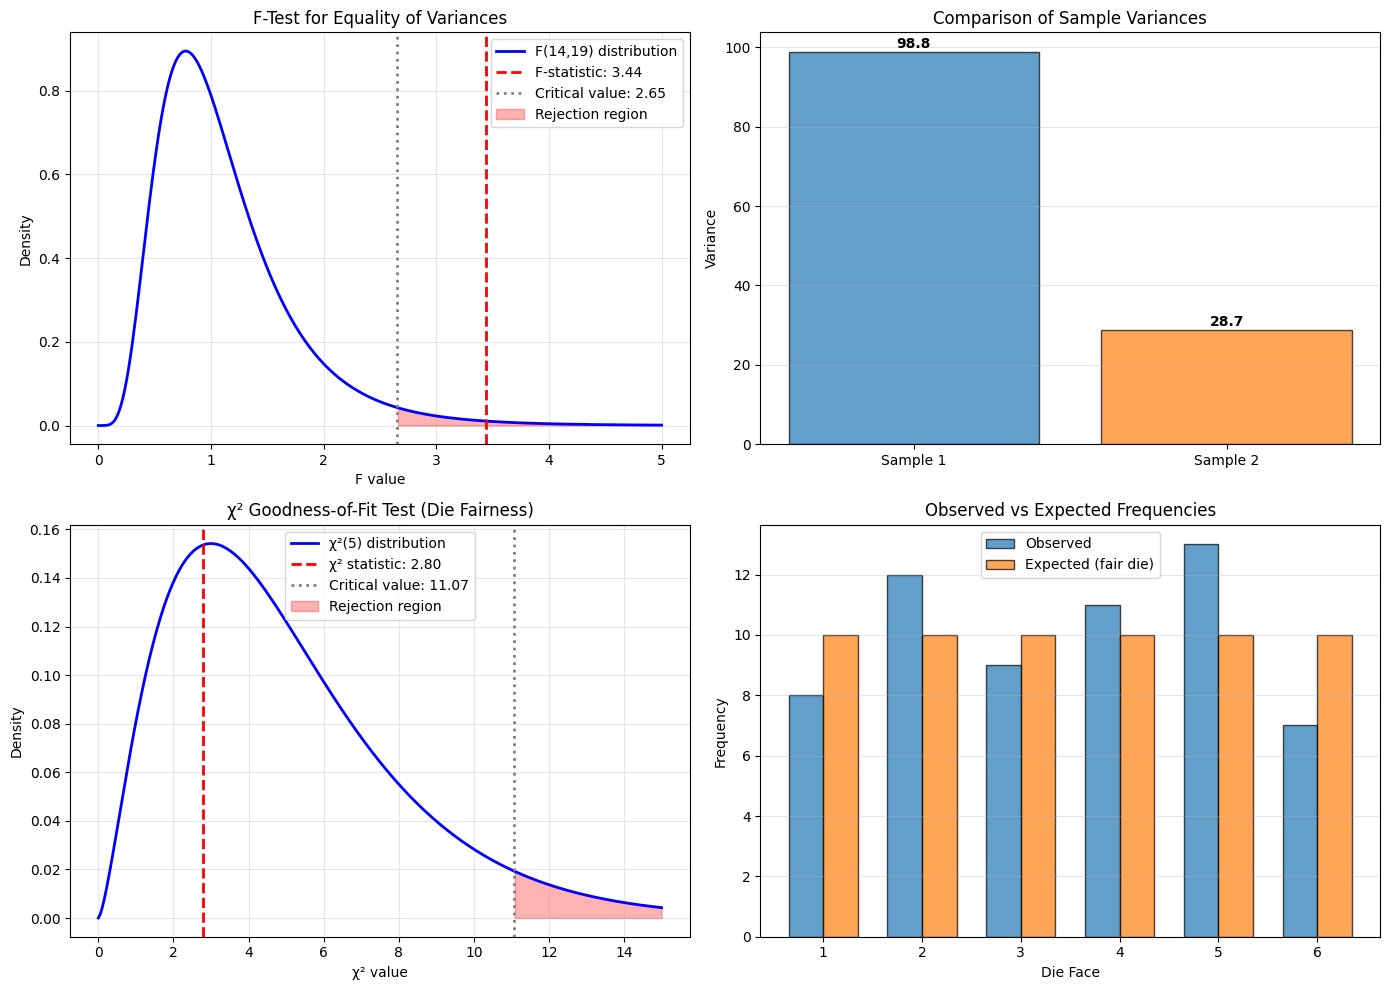

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

print("=" * 60)
print("F-TEST EXAMPLE: Comparing Variances")
print("=" * 60)

# Two samples with different variances
np.random.seed(42)
sample1 = np.random.normal(50, 10, size=15)  # mean=50, std=10
sample2 = np.random.normal(50, 6, size=20)   # mean=50, std=6

var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)
n1, n2 = len(sample1), len(sample2)

# F-statistic (larger variance in numerator)
if var1 > var2:
    F_stat = var1 / var2
    df1, df2 = n1 - 1, n2 - 1
else:
    F_stat = var2 / var1
    df1, df2 = n2 - 1, n1 - 1

# P-value (two-sided)
p_value_f = 2 * (1 - stats.f.cdf(F_stat, df1, df2))
if p_value_f > 1:
    p_value_f = 2 - p_value_f

# Critical value
F_critical = stats.f.ppf(0.975, df1, df2)

print(f"Sample 1: n={n1}, variance={var1:.2f}")
print(f"Sample 2: n={n2}, variance={var2:.2f}")
print(f"F-statistic: {F_stat:.3f}")
print(f"Degrees of freedom: ({df1}, {df2})")
print(f"Critical value (α=0.05): {F_critical:.3f}")
print(f"P-value: {p_value_f:.4f}")
if p_value_f < 0.05:
    print("Conclusion: Reject H₀ - Variances are significantly different")
else:
    print("Conclusion: Fail to reject H₀ - Variances are not significantly different")
print()

print("=" * 60)
print("χ² GOODNESS-OF-FIT TEST EXAMPLE: Testing a Die")
print("=" * 60)

# Observed frequencies from die rolls
observed = np.array([8, 12, 9, 11, 13, 7])
n_rolls = observed.sum()
k = len(observed)

# Expected frequencies for fair die
expected = np.array([n_rolls / k] * k)

print(f"Total rolls: {n_rolls}")
print(f"Observed: {observed}")
print(f"Expected: {expected}")
print()

# Chi-square statistic
chi2_stat = np.sum((observed - expected)**2 / expected)
df = k - 1

# P-value
p_value_chi2 = 1 - stats.chi2.cdf(chi2_stat, df)

# Critical value
chi2_critical = stats.chi2.ppf(0.95, df)

print(f"χ² statistic: {chi2_stat:.3f}")
print(f"Degrees of freedom: {df}")
print(f"Critical value (α=0.05): {chi2_critical:.3f}")
print(f"P-value: {p_value_chi2:.4f}")
if p_value_chi2 < 0.05:
    print("Conclusion: Reject H₀ - Die is not fair")
else:
    print("Conclusion: Fail to reject H₀ - Die appears fair")
print()

# Using scipy's function
chi2_scipy, p_scipy = stats.chisquare(observed, expected)
print(f"Verification with scipy.stats.chisquare:")
print(f"χ² = {chi2_scipy:.3f}, p-value = {p_scipy:.4f}")
print()

print("=" * 60)
print("χ² TEST OF INDEPENDENCE EXAMPLE: Contingency Table")
print("=" * 60)

# Contingency table: Treatment vs Outcome
contingency_table = np.array([
    [50, 150],  # Treatment A: success, failure
    [20, 180]   # Treatment B: success, failure
])

print("Contingency table:")
print("           Success  Failure")
print(f"Treatment A:  {contingency_table[0,0]}      {contingency_table[0,1]}")
print(f"Treatment B:  {contingency_table[1,0]}      {contingency_table[1,1]}")
print()

# Chi-square test of independence
chi2_indep, p_indep, dof, expected_indep = stats.chi2_contingency(contingency_table)

print(f"χ² statistic: {chi2_indep:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_indep:.4f}")
if p_indep < 0.05:
    print("Conclusion: Reject H₀ - Treatment and outcome are dependent")
else:
    print("Conclusion: Fail to reject H₀ - Treatment and outcome appear independent")
print()
print("Expected frequencies under independence:")
print(expected_indep)
print()

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: F-distribution
ax = axes[0, 0]
x_f = np.linspace(0, 5, 300)
y_f = stats.f.pdf(x_f, df1, df2)
ax.plot(x_f, y_f, 'b-', linewidth=2, label=f'F({df1},{df2}) distribution')
ax.axvline(F_stat, color='red', linestyle='--', linewidth=2, label=f'F-statistic: {F_stat:.2f}')
ax.axvline(F_critical, color='gray', linestyle=':', linewidth=2, label=f'Critical value: {F_critical:.2f}')
x_reject = x_f[x_f >= F_critical]
y_reject = stats.f.pdf(x_reject, df1, df2)
ax.fill_between(x_reject, y_reject, alpha=0.3, color='red', label='Rejection region')
ax.set_xlabel('F value')
ax.set_ylabel('Density')
ax.set_title('F-Test for Equality of Variances')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Variance comparison
ax = axes[0, 1]
ax.bar(['Sample 1', 'Sample 2'], [var1, var2], color=['C0', 'C1'], alpha=0.7, edgecolor='black')
ax.set_ylabel('Variance')
ax.set_title('Comparison of Sample Variances')
ax.grid(True, alpha=0.3, axis='y')
for i, v in enumerate([var1, var2]):
    ax.text(i, v+1, f'{v:.1f}', ha='center', fontweight='bold')

# Plot 3: Chi-square distribution for die test
ax = axes[1, 0]
x_chi = np.linspace(0, 15, 300)
y_chi = stats.chi2.pdf(x_chi, df)
ax.plot(x_chi, y_chi, 'b-', linewidth=2, label=f'χ²({df}) distribution')
ax.axvline(chi2_stat, color='red', linestyle='--', linewidth=2, label=f'χ² statistic: {chi2_stat:.2f}')
ax.axvline(chi2_critical, color='gray', linestyle=':', linewidth=2, label=f'Critical value: {chi2_critical:.2f}')
x_reject_chi = x_chi[x_chi >= chi2_critical]
y_reject_chi = stats.chi2.pdf(x_reject_chi, df)
ax.fill_between(x_reject_chi, y_reject_chi, alpha=0.3, color='red', label='Rejection region')
ax.set_xlabel('χ² value')
ax.set_ylabel('Density')
ax.set_title('χ² Goodness-of-Fit Test (Die Fairness)')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 4: Die roll frequencies
ax = axes[1, 1]
faces = ['1', '2', '3', '4', '5', '6']
x_pos = np.arange(len(faces))
width = 0.35
ax.bar(x_pos - width/2, observed, width, label='Observed', alpha=0.7, edgecolor='black')
ax.bar(x_pos + width/2, expected, width, label='Expected (fair die)', alpha=0.7, edgecolor='black')
ax.set_xlabel('Die Face')
ax.set_ylabel('Frequency')
ax.set_title('Observed vs Expected Frequencies')
ax.set_xticks(x_pos)
ax.set_xticklabels(faces)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('f_test_chi_square_tests.png', dpi=150, bbox_inches='tight')
plt.show()


## Key Takeaways

### F-Tests
- Compare two population variances
- Test statistic is ratio of sample variances
- Follows F-distribution with two degrees of freedom parameters
- Sensitive to non-normality; use with caution
- Common use: checking assumption for pooled t-test

### χ² Goodness-of-Fit Tests
- Assess how well data fits a theoretical model
- Test statistic compares observed and expected counts
- Follows chi-square distribution
- Requires expected counts $\geq 5$ in each category
- One-sided test (only reject for large χ²)
- Can also test independence in contingency tables

### General Testing Principles
- State hypotheses before collecting data
- Check assumptions (normality, expected counts, etc.)
- Report test statistic, degrees of freedom, and p-value
- Interpret results in context of the problem